In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as smt

In [3]:
pf = pd.read_csv('haberman.csv')

In [28]:
pf

,Age,OperationYear,AxillaryNodes,SurvivalStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


In [12]:
pf.shape

(306, 4)

In [13]:
pf.columns

Index(['Age', 'OperationYear', 'AxillaryNodes', 'SurvivalStatus'], dtype='object')

# OBJECTIVE : 
To predict whether the patient will survive after 5 years of treatment based upon the Age,year of operation and number of postive lymph nodes

# Univariate Analysis -

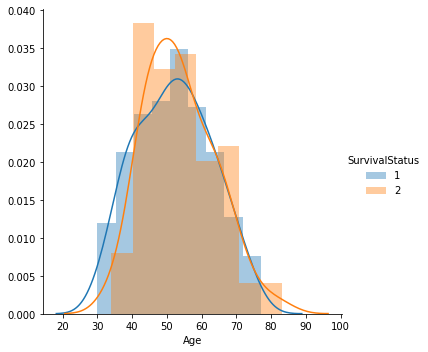

In [19]:
smt.FacetGrid(pf, hue = 'SurvivalStatus', height = 5) \
   .map(smt.distplot, 'Age') \
   .add_legend()
    
plt.show()

* This graph does not tell much about the Survival Status of the Patient as the
  data is overlapped.
* The people below 40 years of Age have more probability to live.
* The people after 77 years of Age are most likely to die within 5 years of surgery

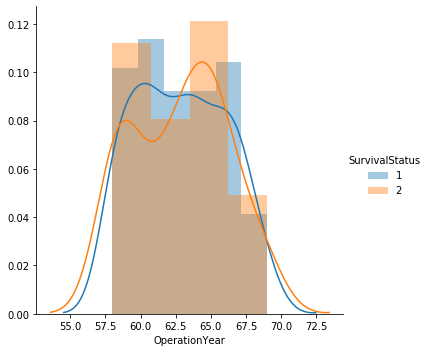

In [24]:
smt.FacetGrid(pf, hue='SurvivalStatus', height = 5) \
   .map(smt.distplot, 'OperationYear') \
   .add_legend()
plt.show()

* This graph does not tell much as the data is overlapping.
* The people whose operation is conducted in year 59 to 63 have higher probability to live.

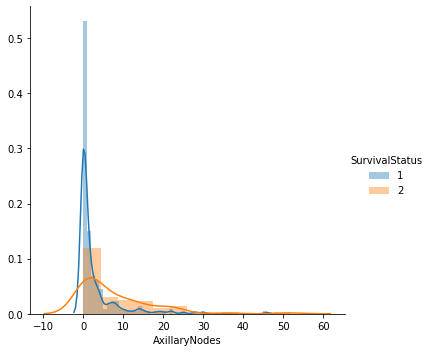

In [22]:
smt.FacetGrid(pf, hue='SurvivalStatus', height = 5) \
   .map(smt.distplot, 'AxillaryNodes') \
   .add_legend()
plt.show()

* 90% to 95% of people have around 25 axillary nodes.
* People who have around 3 axillary nodes are most likely to live.

# PDF & CDF

In [30]:
Survival = pf.loc[pf['SurvivalStatus'] == 1]

In [29]:
Dead = pf.loc[pf['SurvivalStatus'] == 2]

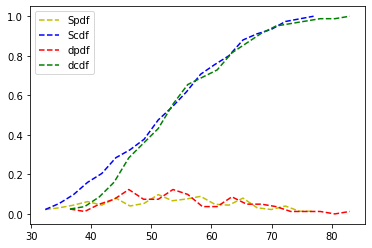

In [66]:
counts, binedges = np.histogram(Survival['Age'], bins = 20, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf,'y--' ,label = 'Spdf')
plt.plot(binedges[1:], cdf,'b--' ,label = 'Scdf')
plt.legend()

counts, binedges = np.histogram(Dead['Age'], bins = 20, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf,'r--', label = 'dpdf')
plt.plot(binedges[1:], cdf,'g--', label = 'dcdf')
plt.legend()
plt.show()

* Not much information can be extracted from this graph.
* The patients who are below 40 years of age have higher chance of survival.
* The patients above 75 years of age are likely to die within 5 years of surgery.

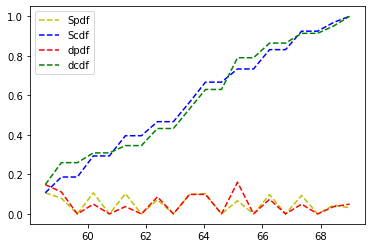

In [67]:
counts, binedges = np.histogram(Survival['OperationYear'], bins = 20, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf,'y--' ,label = 'Spdf')
plt.plot(binedges[1:], cdf,'b--' ,label = 'Scdf')
plt.legend()

counts, binedges = np.histogram(Dead['OperationYear'], bins = 20, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf,'r--', label = 'dpdf')
plt.plot(binedges[1:], cdf,'g--', label = 'dcdf')
plt.legend()
plt.show()

* The graph is overlapping so very small information can be extracted from it i.e from year 59
  to 61 patients have higher survival chance.

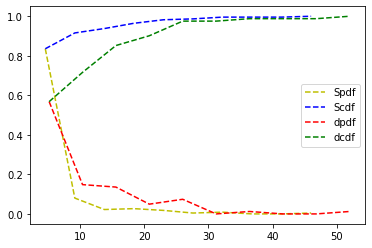

In [61]:
counts, binedges = np.histogram(Survival['AxillaryNodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf,'y--' ,label = 'Spdf')
plt.plot(binedges[1:], cdf,'b--' ,label = 'Scdf')
plt.legend()

counts, binedges = np.histogram(Dead['AxillaryNodes'], bins = 10, density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(binedges[1:], pdf,'r--', label = 'dpdf')
plt.plot(binedges[1:], cdf,'g--', label = 'dcdf')
plt.legend()
plt.show()

* Patients with auxillary node less than 25 have higher chance to survive 

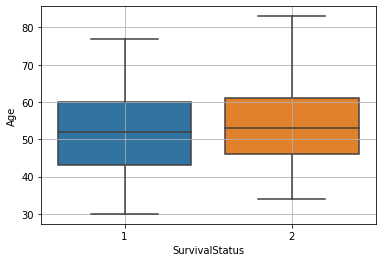

In [15]:
smt.boxplot(x='SurvivalStatus', y='Age', data = pf)
plt.grid()
plt.show()

* Not Much Information can be retrived from the boxplot since most of the boxplot is overlapping
* The people above 77 years of age are likely to die
* The people below 33 years have higher probabilty to live

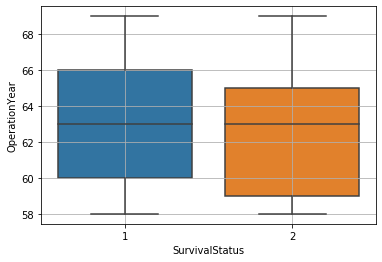

In [17]:
smt.boxplot(x='SurvivalStatus', y='OperationYear', data = pf)
plt.grid()
plt.show()

* Not much info can be gathered from this plot.

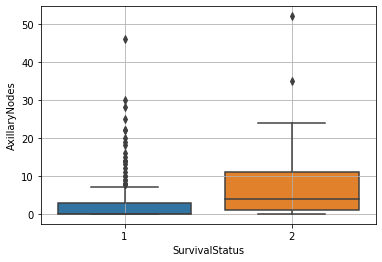

In [20]:
smt.boxplot(x='SurvivalStatus', y='AxillaryNodes', data = pf)
plt.grid()
plt.show()

* People wth auxillary nodes from 0-3 have greater chance of survival.

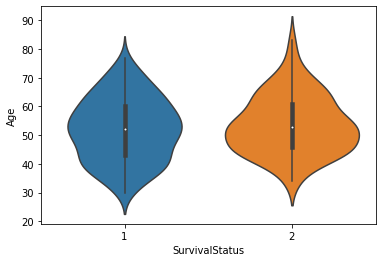

In [22]:
smt.violinplot(x = 'SurvivalStatus', y = 'Age', data = pf, size = 5)
plt.show()

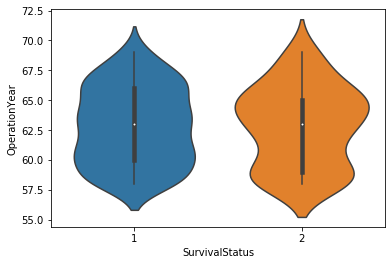

In [23]:
smt.violinplot(x = 'SurvivalStatus', y = 'OperationYear', data = pf, size = 5)
plt.show()

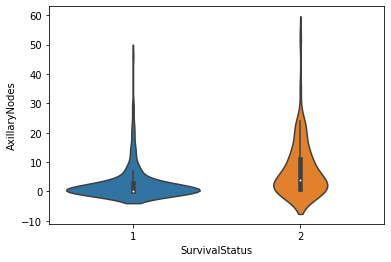

In [27]:
smt.violinplot(x = 'SurvivalStatus', y = 'AxillaryNodes', data = pf, size = 5)
plt.show()

* The patients who has around zero axillary nodes are likely to survive.
* The patients who has greater than 3 axillary nodes have higher probabillty to die.

# Bi-variate Analysis

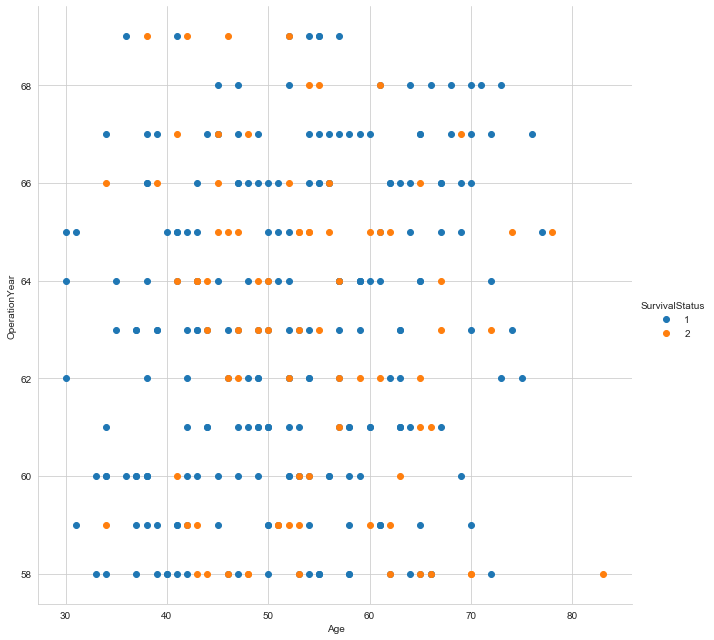

In [44]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'SurvivalStatus', size = 9) \
   .map(plt.scatter, 'Age', 'OperationYear') \
   .add_legend();
plt.show()

* People between Age 30-40 are most likely to survive irrespective of their operation year.
* People with Operation Year 1963-65 and age 45-55 have higher probability of dying within 5 years of surgery.

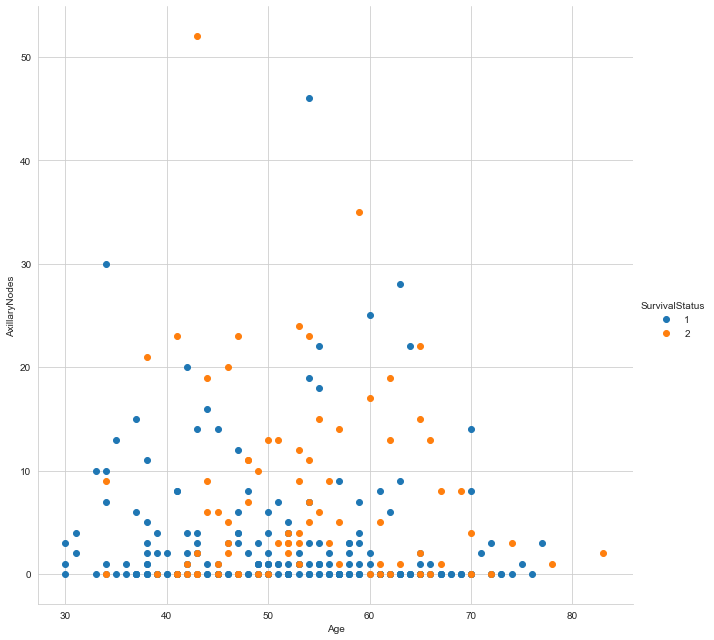

In [50]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'SurvivalStatus', size = 9) \
   .map(plt.scatter, 'Age', 'AxillaryNodes') \
   .add_legend();
plt.show()

* People with less than 3 axillary Nodes are more likely to survive.
* People with more than 10 axillary Node and over 50 years of age are likely to die within 5 years of surgery.
* People above 70 years of age have less than 30 Axillary Nodes.
* People above 20 Axillary Nodes have higher chance of dying within 5 years of surgery.

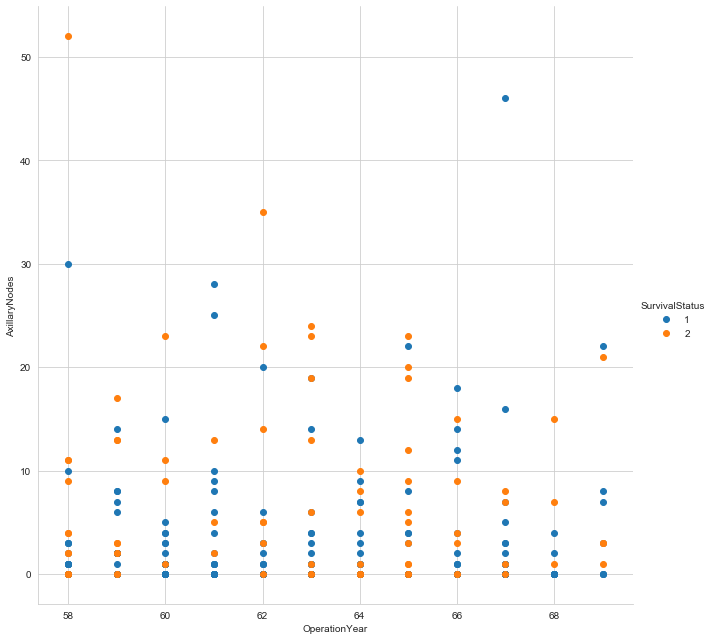

In [49]:
smt.set_style('whitegrid');
smt.FacetGrid(pf, hue = 'SurvivalStatus', size = 9) \
   .map(plt.scatter, 'OperationYear', 'AxillaryNodes') \
   .add_legend();
plt.show()

In [ ]:
* Not much Information can be retrieved from this scatter plot

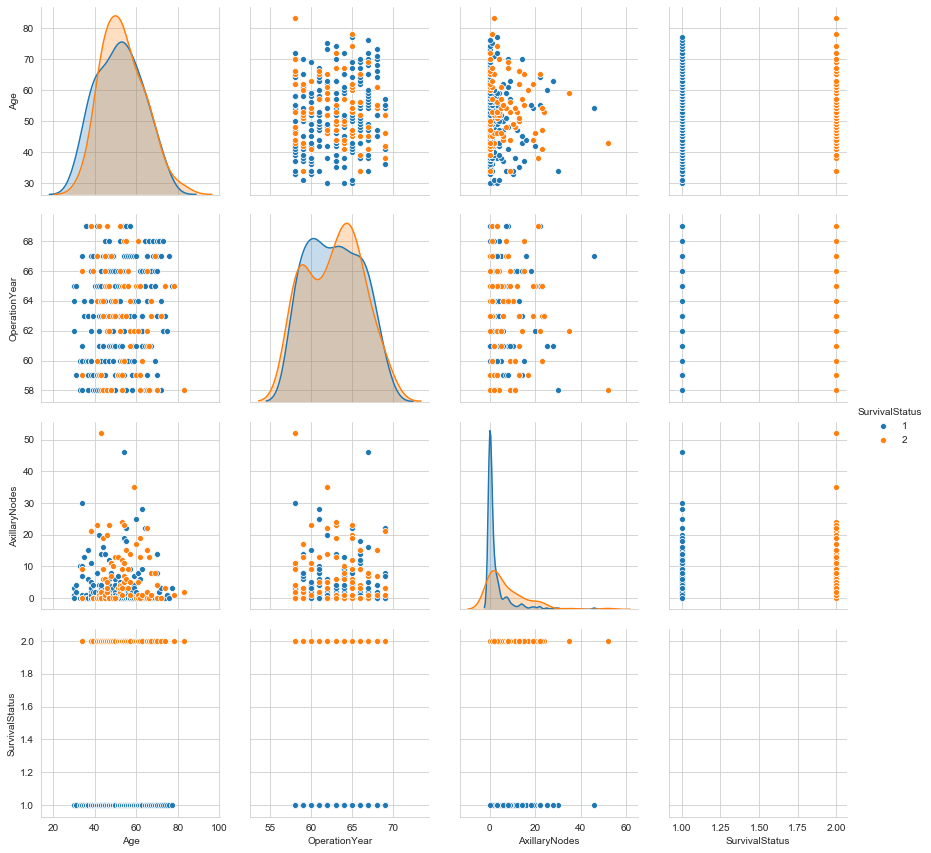

In [47]:
smt.set_style('whitegrid')
smt.pairplot(pf, hue = 'SurvivalStatus', height =3)
plt.show()

* The observations are discribed above best in scatter plots individually